# Data Exploration

In [ ]:
#uncomment this below code to install imblearn package
# !pip install imbalanced-learn

In [ ]:
# !pip install scikit-optimize

In [1]:
import pandas as pd
import numpy as np
import sklearn

#statistics
from scipy.stats import chi2_contingency, ttest_ind

# import cudf #gpu-powered DataFrame (Pandas alternative)

#imbalance handling
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler, RepeatedEditedNearestNeighbours
from imblearn.pipeline import Pipeline

#preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, LabelEncoder, MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split

#hyperparameter search
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from skopt.utils import use_named_args
from skopt import gp_minimize

#internal validation
from sklearn.model_selection import StratifiedKFold, KFold, RepeatedStratifiedKFold, cross_val_score, GridSearchCV, PredefinedSplit, RandomizedSearchCV


#performance metrices
from sklearn.metrics import make_scorer, confusion_matrix, classification_report, f1_score, balanced_accuracy_score, r2_score, auc, average_precision_score, roc_auc_score, recall_score, roc_curve, accuracy_score

#Models selection
from sklearn.naive_bayes import GaussianNB, ComplementNB
from sklearn.linear_model import LogisticRegression, ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
# from cuml.svm import SVC #gpu-powered SVM


#save and load trained model
import pickle

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter

import os

random_state = 42

In [2]:
gridSearchData, crossValData, internalEvaluationData, externalEvaluationData = pickle.load(open('../Clean_data/dataset_2vs1_25102024.sav', 'rb'))
features = pd.read_csv('../Clean_data/data_features_2vs1_2016-2018_21102024.csv', low_memory=False)

In [3]:
EnglandData = pd.concat([gridSearchData, crossValData, internalEvaluationData])

In [4]:
EnglandData['asthmaPlan'] = EnglandData.numAsthmaManagement.apply(lambda x: 0 if x==0 else 1)
externalEvaluationData['asthmaPlan'] = externalEvaluationData.numAsthmaManagement.apply(lambda x: 0 if x==0 else 1)

In [5]:
EnglandData = EnglandData.merge(features[['patid', 'practice_id.x']], on='patid', how='inner')
externalEvaluationData = externalEvaluationData.merge(features[['patid', 'practice_id.x']], on='patid', how='inner')

<Axes: xlabel='asthmaPlan', ylabel='outcome_12months'>

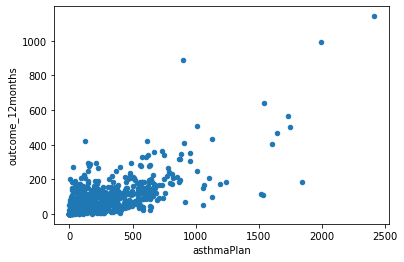

In [6]:
EnglandData[['practice_id.x', 'asthmaPlan', 'outcome_12months']].groupby('practice_id.x').sum().plot.scatter(y='outcome_12months', x='asthmaPlan')

<Axes: xlabel='asthmaPlan', ylabel='outcome_12months'>

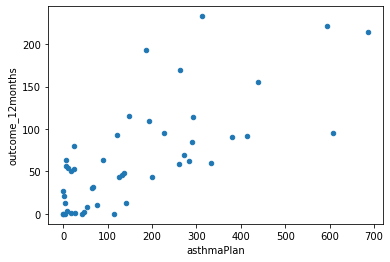

In [7]:
externalEvaluationData[['practice_id.x', 'asthmaPlan', 'outcome_12months']].groupby('practice_id.x').sum().plot.scatter(y='outcome_12months', x='asthmaPlan')

In [10]:
cont_vars = ['age', 'BMI', 'average_daily_dose_ICS',
       'prescribed_daily_dose_ICS', 'ICS_medication_possesion_ratio', 'numPCS',
       'numPCSAsthma', 'numAntibioticsEvents', 'numAntibioticswithLRTI',
       'numOCSEvents', 'numOCSwithLRTI', 'numAsthmaAttacks',
       'numAcuteRespEvents', 'numHospEvents', 'numAsthmaManagement',
       'numAsthmaReview', 'numAsthmaMedReview', 'numAsthmaReviewRCP']

cat_vars = ['sex', 'ethnic_group', 'smokingStatus',
       'imd_decile', 'CharlsonScore', 'PEFStatus', 'EosinophilLevel', 'BTS_step',
       'DeviceType']

len(features_candidate)



41

In [26]:
np.round(.5)

np.float64(0.0)

In [47]:
a = EnglandData[['practice_id.x', var]].groupby('practice_id.x').agg(['mean','median', pd.Series.mode, 'std']).rename_axis('categories').reset_index()

age


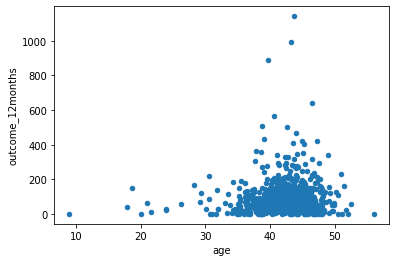

BMI


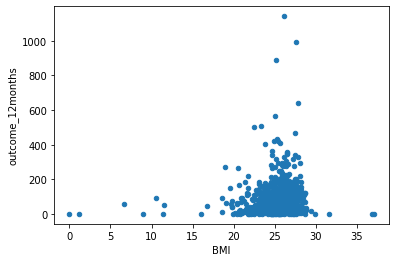

average_daily_dose_ICS


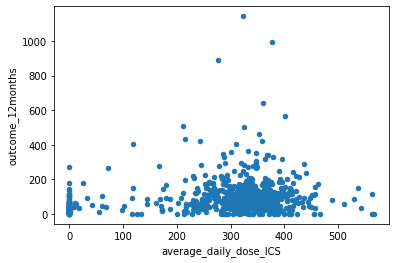

prescribed_daily_dose_ICS


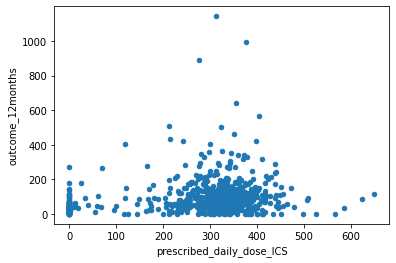

ICS_medication_possesion_ratio


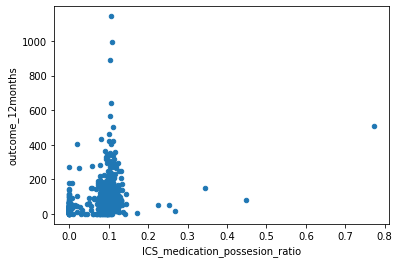

numPCS


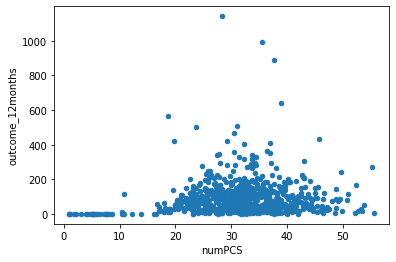

numPCSAsthma


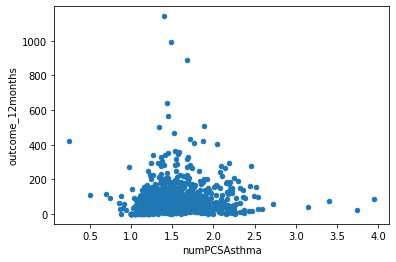

numAntibioticsEvents


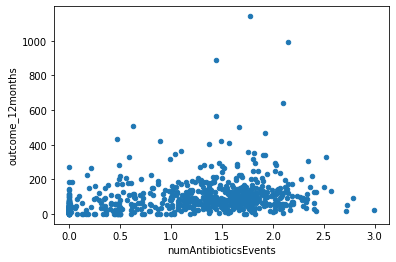

numAntibioticswithLRTI


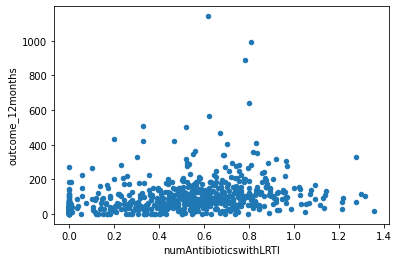

numOCSEvents


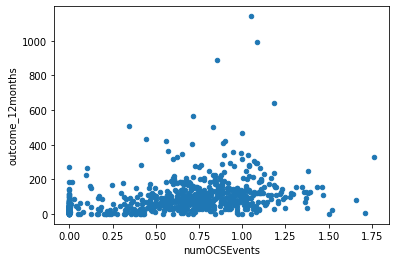

numOCSwithLRTI


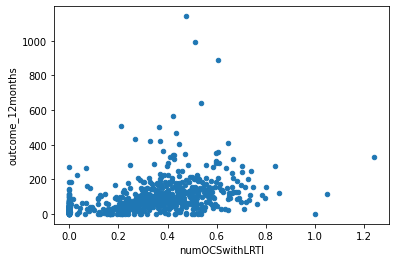

numAsthmaAttacks


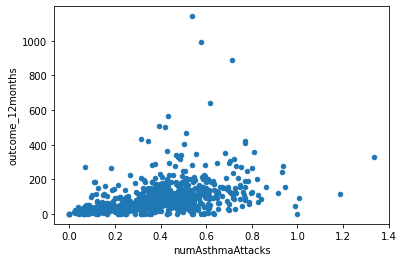

numAcuteRespEvents


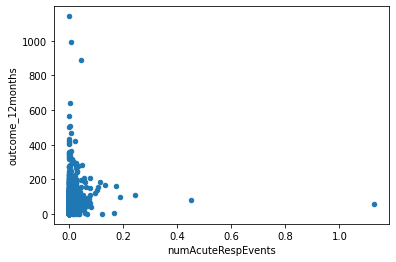

numHospEvents


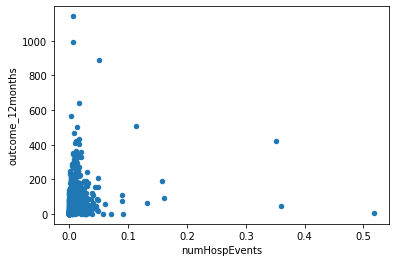

numAsthmaManagement


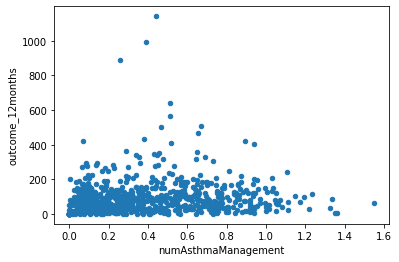

numAsthmaReview


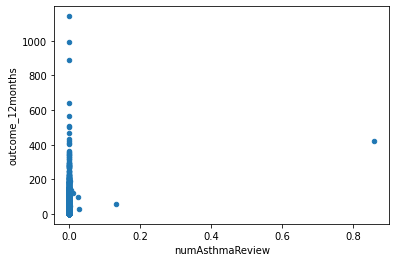

numAsthmaMedReview


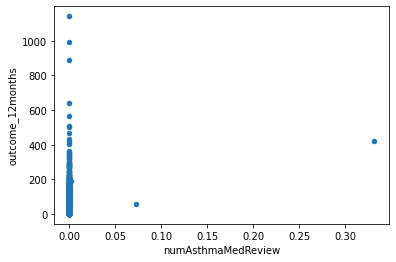

numAsthmaReviewRCP


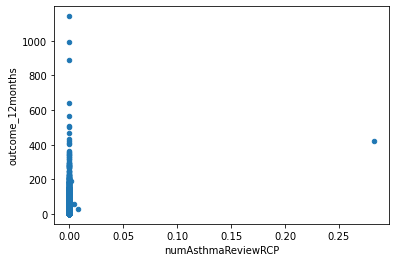

In [50]:
for var in cont_vars:
    print(var)
    # EnglandData[['practice_id.x', 'outcome_12months', var]].groupby('practice_id.x').mean().plot.scatter(y='outcome_12months', x=var)
    a = EnglandData[['practice_id.x', 'outcome_12months']].groupby('practice_id.x').sum()
    b = EnglandData[['practice_id.x', var]].groupby('practice_id.x').mean()
    # b = b.apply(lambda x: np.round(x))
    a = a.merge(b, left_index=True, right_index=True, how='inner')
    a.plot.scatter(y='outcome_12months', x=var)
    plt.show()

In [ ]:
masterData[['practice_id.x', 'asthmaPlan']].groupby('practice_id.x').count().hist()

In [ ]:
EnglandData.numAs

In [ ]:
pd.crosstab(masterData.outcome_12months, features.asthmaPlan, normalize='columns')

In [ ]:
pd.options.display.max_rows = 287
masterData.isna().sum()

In [ ]:
#Positive vs negative class ratio

print('3 months -> 1 : ', round(masterData['outcome_3months'].value_counts()[0]/masterData['outcome_3months'].value_counts()[1],2))
print('6 months -> 1 : ', round(masterData['outcome_6months'].value_counts()[0]/masterData['outcome_6months'].value_counts()[1],2))
print('9 months -> 1 : ', round(masterData['outcome_9months'].value_counts()[0]/masterData['outcome_9months'].value_counts()[1],2))
print('12 months -> 1 : ', round(masterData['outcome_12months'].value_counts()[0]/masterData['outcome_12months'].value_counts()[1],2))
# print('3 months -> 1 : ', round(masterData.outcome_3months.value_counts()[0]/masterData.outcome_3months.value_counts()[1],2))
# print('6 months -> 1 : ', round(masterData.outcome_combined_6months.value_counts()[0]/masterData.outcome_combined_6months.value_counts()[1],2))
# print('9 months -> 1 : ', round(masterData.outcome_combined_9months.value_counts()[0]/masterData.outcome_combined_9months.value_counts()[1],2))
# print('12 months -> 1 : ', round(masterData.outcome_combined_12months.value_counts()[0]/masterData.outcome_combined_12months.value_counts()[1],2))
# print('15 months -> 1 : ', round(masterData.outcome_combined_15months.value_counts()[0]/masterData.outcome_combined_15months.value_counts()[1],2))
# print('18 months -> 1 : ', round(masterData.outcome_combined_18months.value_counts()[0]/masterData.outcome_combined_18months.value_counts()[1],2))
# print('24 months -> 1 : ', round(masterData.outcome_combined_24months.value_counts()[0]/masterData.outcome_combined_24months.value_counts()[1],2))


In [ ]:
#Proportion of asthma attack in each outcome

print('3 months -> ', round(masterData.outcome_3months.value_counts(normalize=True)[1]*100,2), '%')
print('6 months -> ', round(masterData.outcome_6months.value_counts(normalize=True)[1]*100,2), '%')
print('9 months -> ', round(masterData.outcome_9months.value_counts(normalize=True)[1]*100,2), '%')
print('12 months -> ', round(masterData.outcome_12months.value_counts(normalize=True)[1]*100,2), '%')
# print('3 months -> ', round(masterData['outcome_3months'].value_counts()[1]/len(masterData)*100,2), '%')
# print('6 months -> ', round(masterData['outcome_combined_6months'].value_counts()[1]/len(masterData)*100,2), '%')
# print('9 months -> ', round(masterData['outcome_combined_9months'].value_counts()[1]/len(masterData)*100,2), '%')
# print('12 months -> ', round(masterData['outcome_combined_12months'].value_counts()[1]/len(masterData)*100,2), '%')
# print('24 months -> ', round(masterData['outcome_combined_24months'].value_counts()[1]/len(masterData)*100,2), '%')

# Start HERE

In [ ]:
#Data scenario
# 1: all data with ethnicity variable (include all missing values in ethnicity as separate group)
# 2: all data without ethnicity variable
# 3: filter data based on ethnicity (exclude missing values)

scenario = 1 #change it based on the scenario

if scenario == 1:
    #include all data
    allData = masterData
    
elif scenario == 2:
    #Exclude ethnic column
    allData = masterData.drop('ethnic_group', axis=1)
    
elif scenario == 3:
    #exclude missing values for ethnic variable
    allData = masterData[masterData.ethnic_group!='not_recorded']
    
allData = allData.reset_index(drop=True)
print('Data shape for scenario', str(scenario), allData.shape)



In [ ]:
allData.columns

In [ ]:
features_candidate = ['sex', 'age', 'BMI', 'ethnic_group', 'smokingStatus',
       'imd_decile', 'CharlsonScore', 'count_rhinitis', 'count_cardiovascular',
       'count_heartfailure', 'count_psoriasis', 'count_anaphylaxis',
       'count_diabetes', 'count_ihd', 'count_anxiety', 'count_eczema',
       'count_nasalpolyps', 'count_paracetamol', 'count_nsaids',
       'count_betablocker', 'PEFStatus', 'EosinophilLevel', 'BTS_step',
       'DeviceType', 'PriorEducation', 'average_daily_dose_ICS',
       'prescribed_daily_dose_ICS', 'ICS_medication_possesion_ratio', 'numPCS',
       'numPCSAsthma', 'numAntibioticsEvents', 'numAntibioticswithLRTI',
       'numOCSEvents', 'numOCSwithLRTI', 'numAsthmaAttacks',
       'numAcuteRespEvents', 'numHospEvents', 'numAsthmaManagement',
       'numAsthmaReview', 'numAsthmaMedReview', 'numAsthmaReviewRCP']
len(features_candidate)

In [ ]:
#onehot encoding for categorical variables
onehot_vars = ['BMI_cat', 'ethnic_group', 'smokingStatus', 'imd_decile', 'CharlsonScore',
               'PEFStatus', 'EosinophilLevel', 'BTS_step', 'DeviceType',  'PriorEducation',]
allData = pd.get_dummies(allData, columns=onehot_vars, dtype='int')
allData.columns

In [ ]:
#make sure get_dummies use 1 0 not true false
allData.iloc[:,80:]

In [ ]:
#Split training set into grid search, cross val, and internal validation

trainingData = allData[(allData.set == 'training')] #& (allData.age>=18)
gridSearchData, crossValData = train_test_split(trainingData, train_size=0.05, stratify=trainingData['outcome_12months'], random_state=random_state)
crossValData, internalEvaluationData = train_test_split(crossValData, test_size=0.215, stratify=crossValData['outcome_12months'],  random_state=random_state)
gridSearchData.reset_index(drop=True, inplace=True)
crossValData.reset_index(drop=True, inplace=True)
internalEvaluationData.reset_index(drop=True, inplace=True)

In [ ]:
#Proportion of asthma attack in each outcome - training

print('3 months -> ', round(gridSearchData['outcome_3months'].value_counts()[1]/len(gridSearchData)*100,2), '%')
print('6 months -> ', round(gridSearchData['outcome_6months'].value_counts()[1]/len(gridSearchData)*100,2), '%')
print('9 months -> ', round(gridSearchData['outcome_9months'].value_counts()[1]/len(gridSearchData)*100,2), '%')
print('12 months -> ', round(gridSearchData['outcome_12months'].value_counts()[1]/len(gridSearchData)*100,2), '%')
# print('3 months -> ', round(trainingData['outcome_3months'].value_counts()[1]/len(trainingData)*100,2), '%')
# print('6 months -> ', round(trainingData['outcome_combined_6months'].value_counts()[1]/len(trainingData)*100,2), '%')
# print('9 months -> ', round(trainingData['outcome_combined_9months'].value_counts()[1]/len(trainingData)*100,2), '%')
# print('12 months -> ', round(trainingData['outcome_combined_12months'].value_counts()[1]/len(trainingData)*100,2), '%')
# print('24 months -> ', round(trainingData['outcome_combined_24months'].value_counts()[1]/len(trainingData)*100,2), '%')

In [ ]:
#Proportion of asthma attack in each outcome - validation

print('3 months -> ', round(crossValData['outcome_3months'].value_counts()[1]/len(crossValData)*100,2), '%')
print('6 months -> ', round(crossValData['outcome_6months'].value_counts()[1]/len(crossValData)*100,2), '%')
print('9 months -> ', round(crossValData['outcome_9months'].value_counts()[1]/len(crossValData)*100,2), '%')
print('12 months -> ', round(crossValData['outcome_12months'].value_counts()[1]/len(crossValData)*100,2), '%')
# print('3 months -> ', round(validationData['outcome_3months'].value_counts()[1]/len(validationData)*100,2), '%')
# print('6 months -> ', round(validationData['outcome_combined_6months'].value_counts()[1]/len(validationData)*100,2), '%')
# print('9 months -> ', round(validationData['outcome_combined_9months'].value_counts()[1]/len(validationData)*100,2), '%')
# print('12 months -> ', round(validationData['outcome_combined_12months'].value_counts()[1]/len(validationData)*100,2), '%')
# print('24 months -> ', round(validationData['outcome_combined_24months'].value_counts()[1]/len(validationData)*100,2), '%')

In [ ]:
#Proportion of asthma attack in each outcome - internalEvaluation

print('3 months -> ', round(internalEvaluationData['outcome_3months'].value_counts()[1]/len(internalEvaluationData)*100,2), '%')
print('6 months -> ', round(internalEvaluationData['outcome_6months'].value_counts()[1]/len(internalEvaluationData)*100,2), '%')
print('9 months -> ', round(internalEvaluationData['outcome_9months'].value_counts()[1]/len(internalEvaluationData)*100,2), '%')
print('12 months -> ', round(internalEvaluationData['outcome_12months'].value_counts()[1]/len(internalEvaluationData)*100,2), '%')

In [ ]:
externalEvaluationData = allData[allData.set == 'evaluation']
externalEvaluationData = externalEvaluationData.drop_duplicates('patid')
externalEvaluationData.reset_index(drop=True, inplace=True)
print('size: ', externalEvaluationData.shape)
#Proportion of asthma attack in each outcome - internalEvaluation

print('3 months -> ', round(externalEvaluationData['outcome_3months'].value_counts()[1]/len(externalEvaluationData)*100,2), '%')
print('6 months -> ', round(externalEvaluationData['outcome_6months'].value_counts()[1]/len(externalEvaluationData)*100,2), '%')
print('9 months -> ', round(externalEvaluationData['outcome_9months'].value_counts()[1]/len(externalEvaluationData)*100,2), '%')
print('12 months -> ', round(externalEvaluationData['outcome_12months'].value_counts()[1]/len(externalEvaluationData)*100,2), '%')

In [ ]:
print(f'Grid search size: {gridSearchData.shape}')
print(f'Cross val size: {crossValData.shape}')
print(f'Internal val size: {internalEvaluationData.shape}')
print(f'External val size: {externalEvaluationData.shape}')

In [ ]:
#Save original data
# trainingData.to_csv('../FinalData/trainingData_2vs1_16112023.csv', index_label=False, index=False)
# validationData.to_csv('../FinalData/validationData_2vs1_16112023.csv', index_label=False, index=False)
# internalEvaluationData.to_csv('../FinalData/internalEvalulationData_2vs1_16112023.csv', index_label=False, index=False)
# evaluationData.to_csv('../FinalData/evaluationData_2vs1_16112023.csv', index_label=False, index=False)
# evaluationDataWales.to_csv('../FinalData/evaluationDataWales_2vs1_16112023.csv', index_label=False, index=False)
# evaluationDataScotland.to_csv('../FinalData/evaluationDataScotland_2vs1_16112023.csv', index_label=False, index=False)
sets = [gridSearchData, crossValData, internalEvaluationData, externalEvaluationData]
pickle.dump(sets, open('../Clean_data/dataset_2vs1_25102024.sav', 'wb'))

In [ ]:
# #encode categorical data
# # 
# # cat_vars = [, 'PEFStatus','EosinophilLevel']
# # data_categorical = trainingData[cat_vars]
# onehot_vars = ['ethnic_group','smokingStatus', 'DeviceType', 'cat_BMI', 'imd_decile', 'PEFStatus','EosinophilLevel', 'BTS_step']
# data_onehot = trainingData[onehot_vars]

# #ordinal encoder
# # encoder = OrdinalEncoder(categories=[['not_recorded','less than 60', '60-80', 'more than 80'], ['unknown', 'normal', 'high']]).set_output(transform="pandas")
# # data_encoded = encoder.fit_transform(data_categorical)
# # pickle.dump(encoder, open('../Models/cat_encoder.pkl', 'wb'))
    
# #one hot encoder
# onehot_encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
# onehot_encoded = onehot_encoder.fit_transform(data_onehot)
# pickle.dump(onehot_encoder, open('../Models/onehot_encoder.pkl', 'wb'))

# # trainingData = pd.concat([trainingData.drop(cat_vars, axis=1), data_encoded], axis=1)
# trainingData = pd.concat([trainingData.drop(onehot_vars, axis=1), onehot_encoded], axis=1)

# print('Data shape after encoding: ', trainingData.shape)

In [ ]:
# #encode cat vars for validation and evaluation set
# # data_val_categorical = validationData[cat_vars]
# data_val_onehot = validationData[onehot_vars]
# data_internaleval_onehot = internalEvaluationData[onehot_vars]
# # data_eval_categorical = evaluationData[cat_vars]
# data_eval_onehot = evaluationData[onehot_vars]
# # data_eval_Wales_categorical = evaluationDataWales[cat_vars]
# data_eval_Wales_onehot = evaluationDataWales[onehot_vars]
# # data_eval_Scotland_categorical = evaluationDataScotland[cat_vars]
# data_eval_Scotland_onehot = evaluationDataScotland[onehot_vars]

# # encoder = pickle.load(open('../Models/cat_encoder.pkl', 'rb'))
# # data_val_encoded = encoder.transform(data_val_categorical)
# # data_eval_encoded = encoder.transform(data_eval_categorical)
# # data_eval_Wales_encoded = encoder.transform(data_eval_Wales_categorical)
# # data_eval_Scotland_encoded = encoder.transform(data_eval_Scotland_categorical)

# onehot_encoder = pickle.load(open('../Models/onehot_encoder.pkl', 'rb'))
# onehot_val_encoded = onehot_encoder.transform(data_val_onehot)
# onehot_internaleval_encoded = onehot_encoder.transform(data_internaleval_onehot)
# onehot_eval_encoded = onehot_encoder.transform(data_eval_onehot)
# onehot_eval_Wales_encoded = onehot_encoder.transform(data_eval_Wales_onehot)
# onehot_eval_Scotland_encoded = onehot_encoder.transform(data_eval_Scotland_onehot)

# # validationData = pd.concat([validationData.drop(cat_vars, axis=1), data_val_encoded], axis=1)
# validationData = pd.concat([validationData.drop(onehot_vars, axis=1), onehot_val_encoded], axis=1)

# # evaluationData = pd.concat([evaluationData.drop(cat_vars, axis=1), data_eval_encoded], axis=1)
# internalEvaluationData = pd.concat([internalEvaluationData.drop(onehot_vars, axis=1), onehot_internaleval_encoded], axis=1)

# # evaluationData = pd.concat([evaluationData.drop(cat_vars, axis=1), data_eval_encoded], axis=1)
# evaluationData = pd.concat([evaluationData.drop(onehot_vars, axis=1), onehot_eval_encoded], axis=1)

# # evaluationDataWales = pd.concat([evaluationDataWales.drop(cat_vars, axis=1), data_eval_Wales_encoded], axis=1)
# evaluationDataWales = pd.concat([evaluationDataWales.drop(onehot_vars, axis=1), onehot_eval_Wales_encoded], axis=1)

# # evaluationDataScotland = pd.concat([evaluationDataScotland.drop(cat_vars, axis=1), data_eval_Scotland_encoded], axis=1)
# evaluationDataScotland = pd.concat([evaluationDataScotland.drop(onehot_vars, axis=1), onehot_eval_Scotland_encoded], axis=1)

# print('Val data shape after encoding: ', validationData.shape)
# print('Internal Eval data shape after encoding: ', internalEvaluationData.shape)
# print('Eval data shape after encoding: ', evaluationData.shape)
# print('Evaluation data Wales shape: ', evaluationDataWales.shape)
# print('Evaluation data Scotland shape: ', evaluationDataScotland.shape)

# Cont Var Scalling

In [ ]:
allData.columns.values

In [ ]:
continuous_vars = ['age', 'average_daily_dose_ICS', 'prescribed_daily_dose_ICS',
                   'ICS_medication_possesion_ratio', 'numPCS', 'numPCSAsthma',
                   'numAntibioticsEvents', 'numAntibioticswithLRTI', 'numOCSEvents',
                   'numOCSwithLRTI', 'numAsthmaAttacks', 'numAcuteRespEvents',
                   'numHospEvents', 'numAsthmaManagement', 'numAsthmaReview',
                   'numAsthmaMedReview', 'numAsthmaReviewRCP',]
len(continuous_vars)

In [ ]:
#Data normalisation for continous variable into 0-1 range based on gridSearch set

# define scaler
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(gridSearchData[continuous_vars])
pickle.dump(scaler, open('../Models/cont_scaler.pkl', 'wb'))


data_scaled = pd.DataFrame(data_scaled, columns=scaler.get_feature_names_out())
gridSearchData = pd.concat([gridSearchData.drop(continuous_vars, axis=1), data_scaled], axis=1)

print('Data shape after scaling: ', gridSearchData.shape)

In [ ]:
#Normalisation for other sets

scaler = pickle.load(open('../Models/cont_scaler.pkl', 'rb'))
data_val_scaled = scaler.transform(crossValData[continuous_vars])
data_internal_eval_scaled = scaler.transform(internalEvaluationData[continuous_vars])
data_external_eval_scaled = scaler.transform(externalEvaluationData[continuous_vars])

data_val_scaled = pd.DataFrame(data_val_scaled, columns=scaler.get_feature_names_out())
crossValData = pd.concat([crossValData.drop(continuous_vars, axis=1), data_val_scaled], axis=1)

data_internal_eval_scaled = pd.DataFrame(data_internal_eval_scaled, columns=scaler.get_feature_names_out())
internalEvaluationData = pd.concat([internalEvaluationData.drop(continuous_vars, axis=1), data_internal_eval_scaled], axis=1)

data_external_eval_scaled = pd.DataFrame(data_external_eval_scaled, columns=scaler.get_feature_names_out())
externalEvaluationData = pd.concat([externalEvaluationData.drop(continuous_vars, axis=1), data_external_eval_scaled], axis=1)


print('Val data shape after scaling: ', crossValData.shape)
print('Eval data shape after scaling: ', internalEvaluationData.shape)
print('Evaluation data Wales shape: ', externalEvaluationData.shape)

In [ ]:
#Define feature candidates

features_columns = gridSearchData.columns.to_list()
exclude_columns = ['patid', 'practice_id', 'set', #identifier
                   'BMI', #use the categorical instead
                   'ethnicity', #use ethnic_group instead
                   'Spacer',  #all zero
                   
                   'outcome_3months', 'outcome_6months', 'outcome_9months', 'outcome_12months', 'outcome_15months', 'outcome_18months', 
                   'outcome_21months', 'outcome_24months', 'outcome_combined_6months', 'outcome_combined_9months', 'outcome_combined_12months', 
                   'outcome_combined_15months', 'outcome_combined_18months', 'outcome_combined_24months', '3months', '6months', '12months', '24months', #outcomes variable
                   
                   'postcode_district', 'County', 'LocalAuthority', 'OutputAreaClassification', #location related variables, use IMD decile only
                   
                   'age_cat', 'ICS_medication_possesion_ratio_cat', 'numOCS_cat', 'numOCSEvents_cat', 'numOCSwithLRTI_cat', 'numAcuteRespEvents_cat', 
                   'numAntibioticsEvents_cat', 'numAntibioticswithLRTI_cat', 'numAsthmaAttacks_cat', 'numHospEvents_cat', 'numPCS_cat', 'numPCSAsthma_cat', 
                   'numAsthmaManagement_cat', 'numAsthmaReview_cat', 'numAsthmaMedReview_cat', 'numAsthmaReviewRCP_cat', 'average_daily_dose_ICS_cat', 
                   'prescribed_daily_dose_ICS_cat', #use continous vars instead
                   
                   'count_rhinitis', 'count_cardiovascular', 'count_heartfailure',
                   'count_psoriasis', 'count_anaphylaxis', 'count_diabetes', 'count_ihd',
                   'count_anxiety', 'count_eczema', 'count_nasalpolyps',
                   'count_paracetamol', 'count_nsaids', 'count_betablocker', #use binary ones
                   
                   'paracetamol', 'nsaids', 'betablocker', #no data in evaluation
                                      
                  ]
# exclude_columns = exclude_columns + [x for x in features_columns if '_count' in x] #filter out commorbid count variables
features_columns = [x for x in features_columns if x not in exclude_columns]
print('Features size: ', len(features_columns))
print(features_columns)

In [ ]:
#make sure no data leak between sets
print(list(set(gridSearchData.patid.values).intersection(set(crossValData.patid.values))))
print(list(set(gridSearchData.patid.values).intersection(set(internalEvaluationData.patid.values))))
print(list(set(crossValData.patid.values).intersection(set(internalEvaluationData.patid.values))))
print(list(set(crossValData.patid.values).intersection(set(externalEvaluationData.patid.values))))
print(list(set(gridSearchData.patid.values).intersection(set(externalEvaluationData.patid.values))))


In [ ]:
#Save encoded data
# trainingData.to_csv('../FinalData/trainingDataEncoded_2vs1_16112023.csv', index_label=False, index=False)
# validationData.to_csv('../FinalData/validationDataEncoded_2vs1_16112023.csv', index_label=False, index=False)
# internalEvaluationData.to_csv('../FinalData/internalEvaluationDataEncoded_2vs1_16112023.csv', index_label=False, index=False)
# evaluationData.to_csv('../FinalData/evaluationDataEncoded_2vs1_16112023.csv', index_label=False, index=False)
# evaluationDataWales.to_csv('../FinalData/evaluationDataWalesEncoded_2vs1_16112023.csv', index_label=False, index=False)
# evaluationDataScotland.to_csv('../FinalData/evaluationDataScotlandEncoded_2vs1_16112023.csv', index_label=False, index=False)
sets = [gridSearchData, crossValData, internalEvaluationData, externalEvaluationData]
pickle.dump(sets, open('../Clean_data/dataset_scaled_2vs1_25102024.sav', 'wb'))